In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df['Species'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,137,6.3,3.4,5.6,2.4,2
77,78,6.7,3.0,5.0,1.7,1
20,21,5.4,3.4,1.7,0.2,0
58,59,6.6,2.9,4.6,1.3,1
26,27,5.0,3.4,1.6,0.4,0


In [6]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Click on the above link to see the default parameters of decision tree in sklearn

tree = DecisionTreeClassifier()

In [11]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
# These are the libraries to install for visualizing the decision Tree

#!pip install six
#!pip install pydotplus
#!pip install graphviz

In [13]:
# Importing required packages for visualization

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

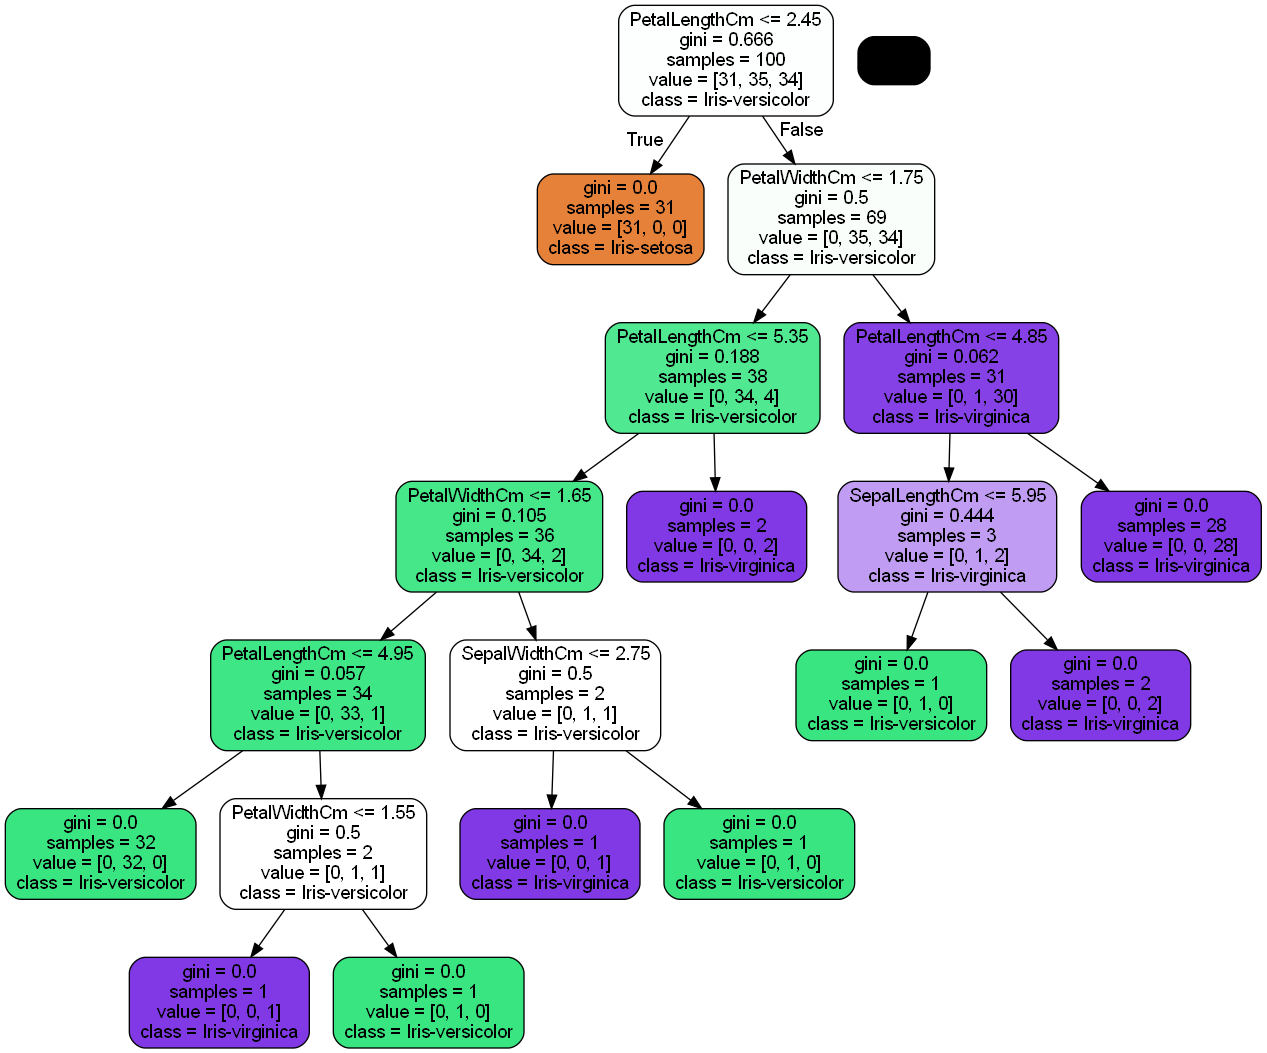

In [14]:
# plotting tree with max_depth=3

dot_data = StringIO()  

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#Image(graph.create_png(),width=800,height=900)

## Alternative method for Graphviz / Visualizing the Decision Tree

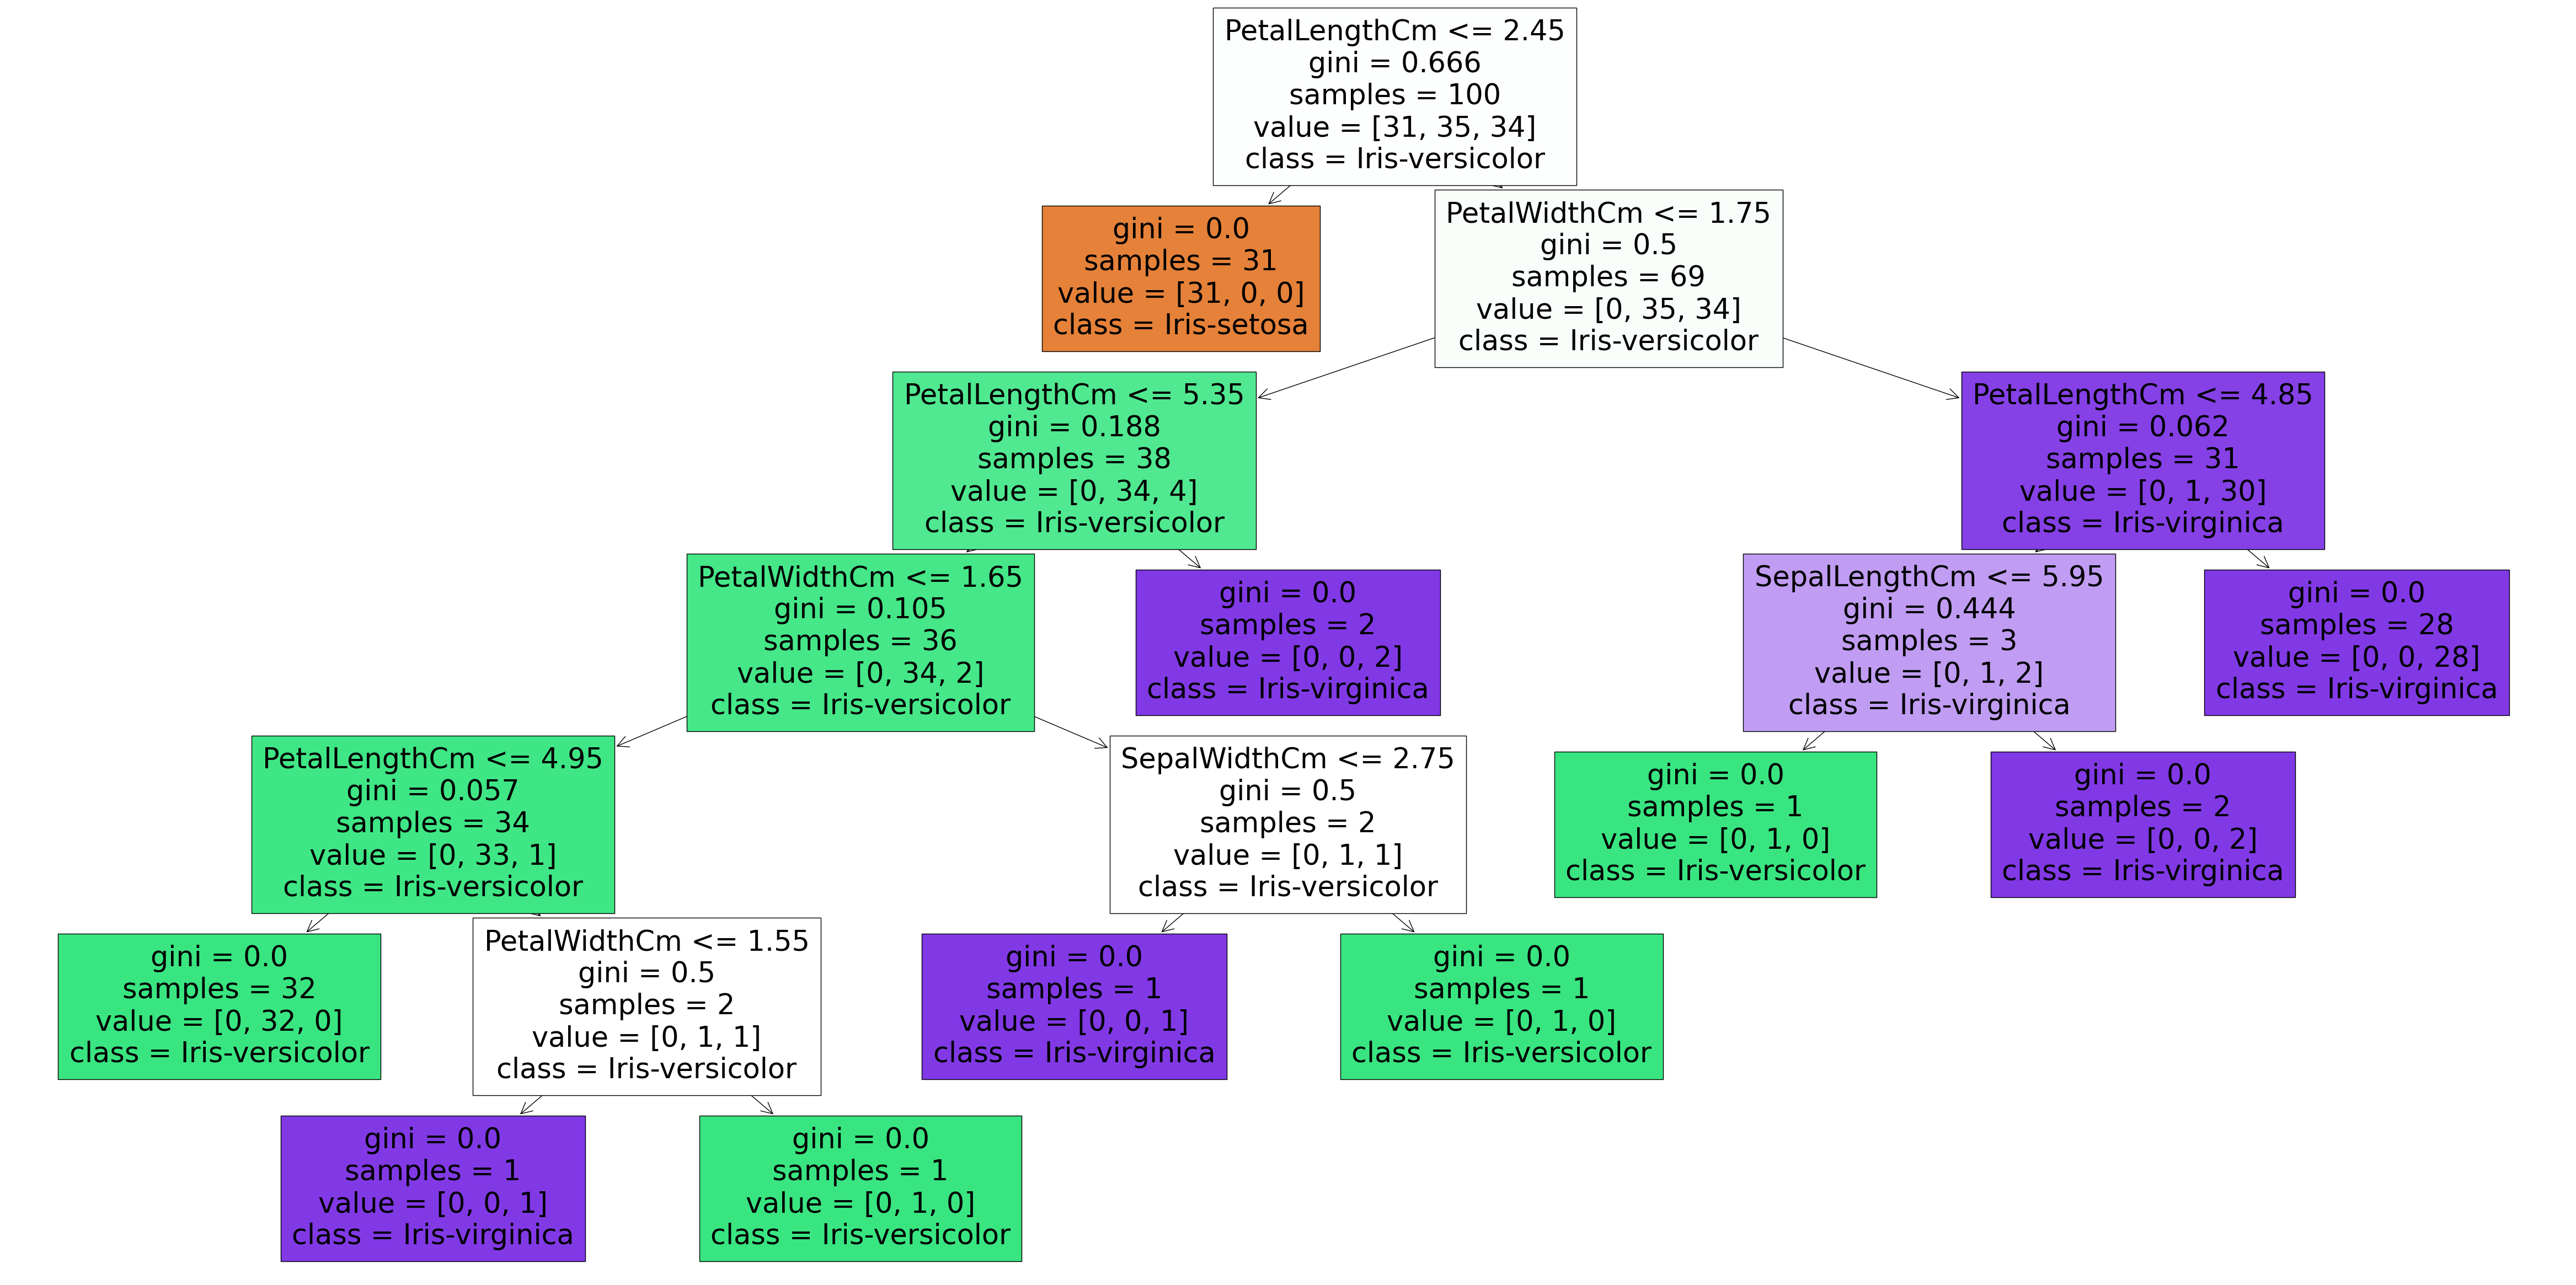

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(60,30))

plot_tree(tree, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

In [16]:
# Let's check the accuracy score and confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [17]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 1.0
Train Confusion Matrix:
[[31  0  0]
 [ 0 35  0]
 [ 0  0 34]]
--------------------------------------------------
Test Performance : 1.0
Test Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [18]:
# Let's use post-pruning technique
# As you see in the decision tree there are so many unnecessary splits so we use max_depth parameter 

tree1 = DecisionTreeClassifier(max_depth=2)

In [19]:
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

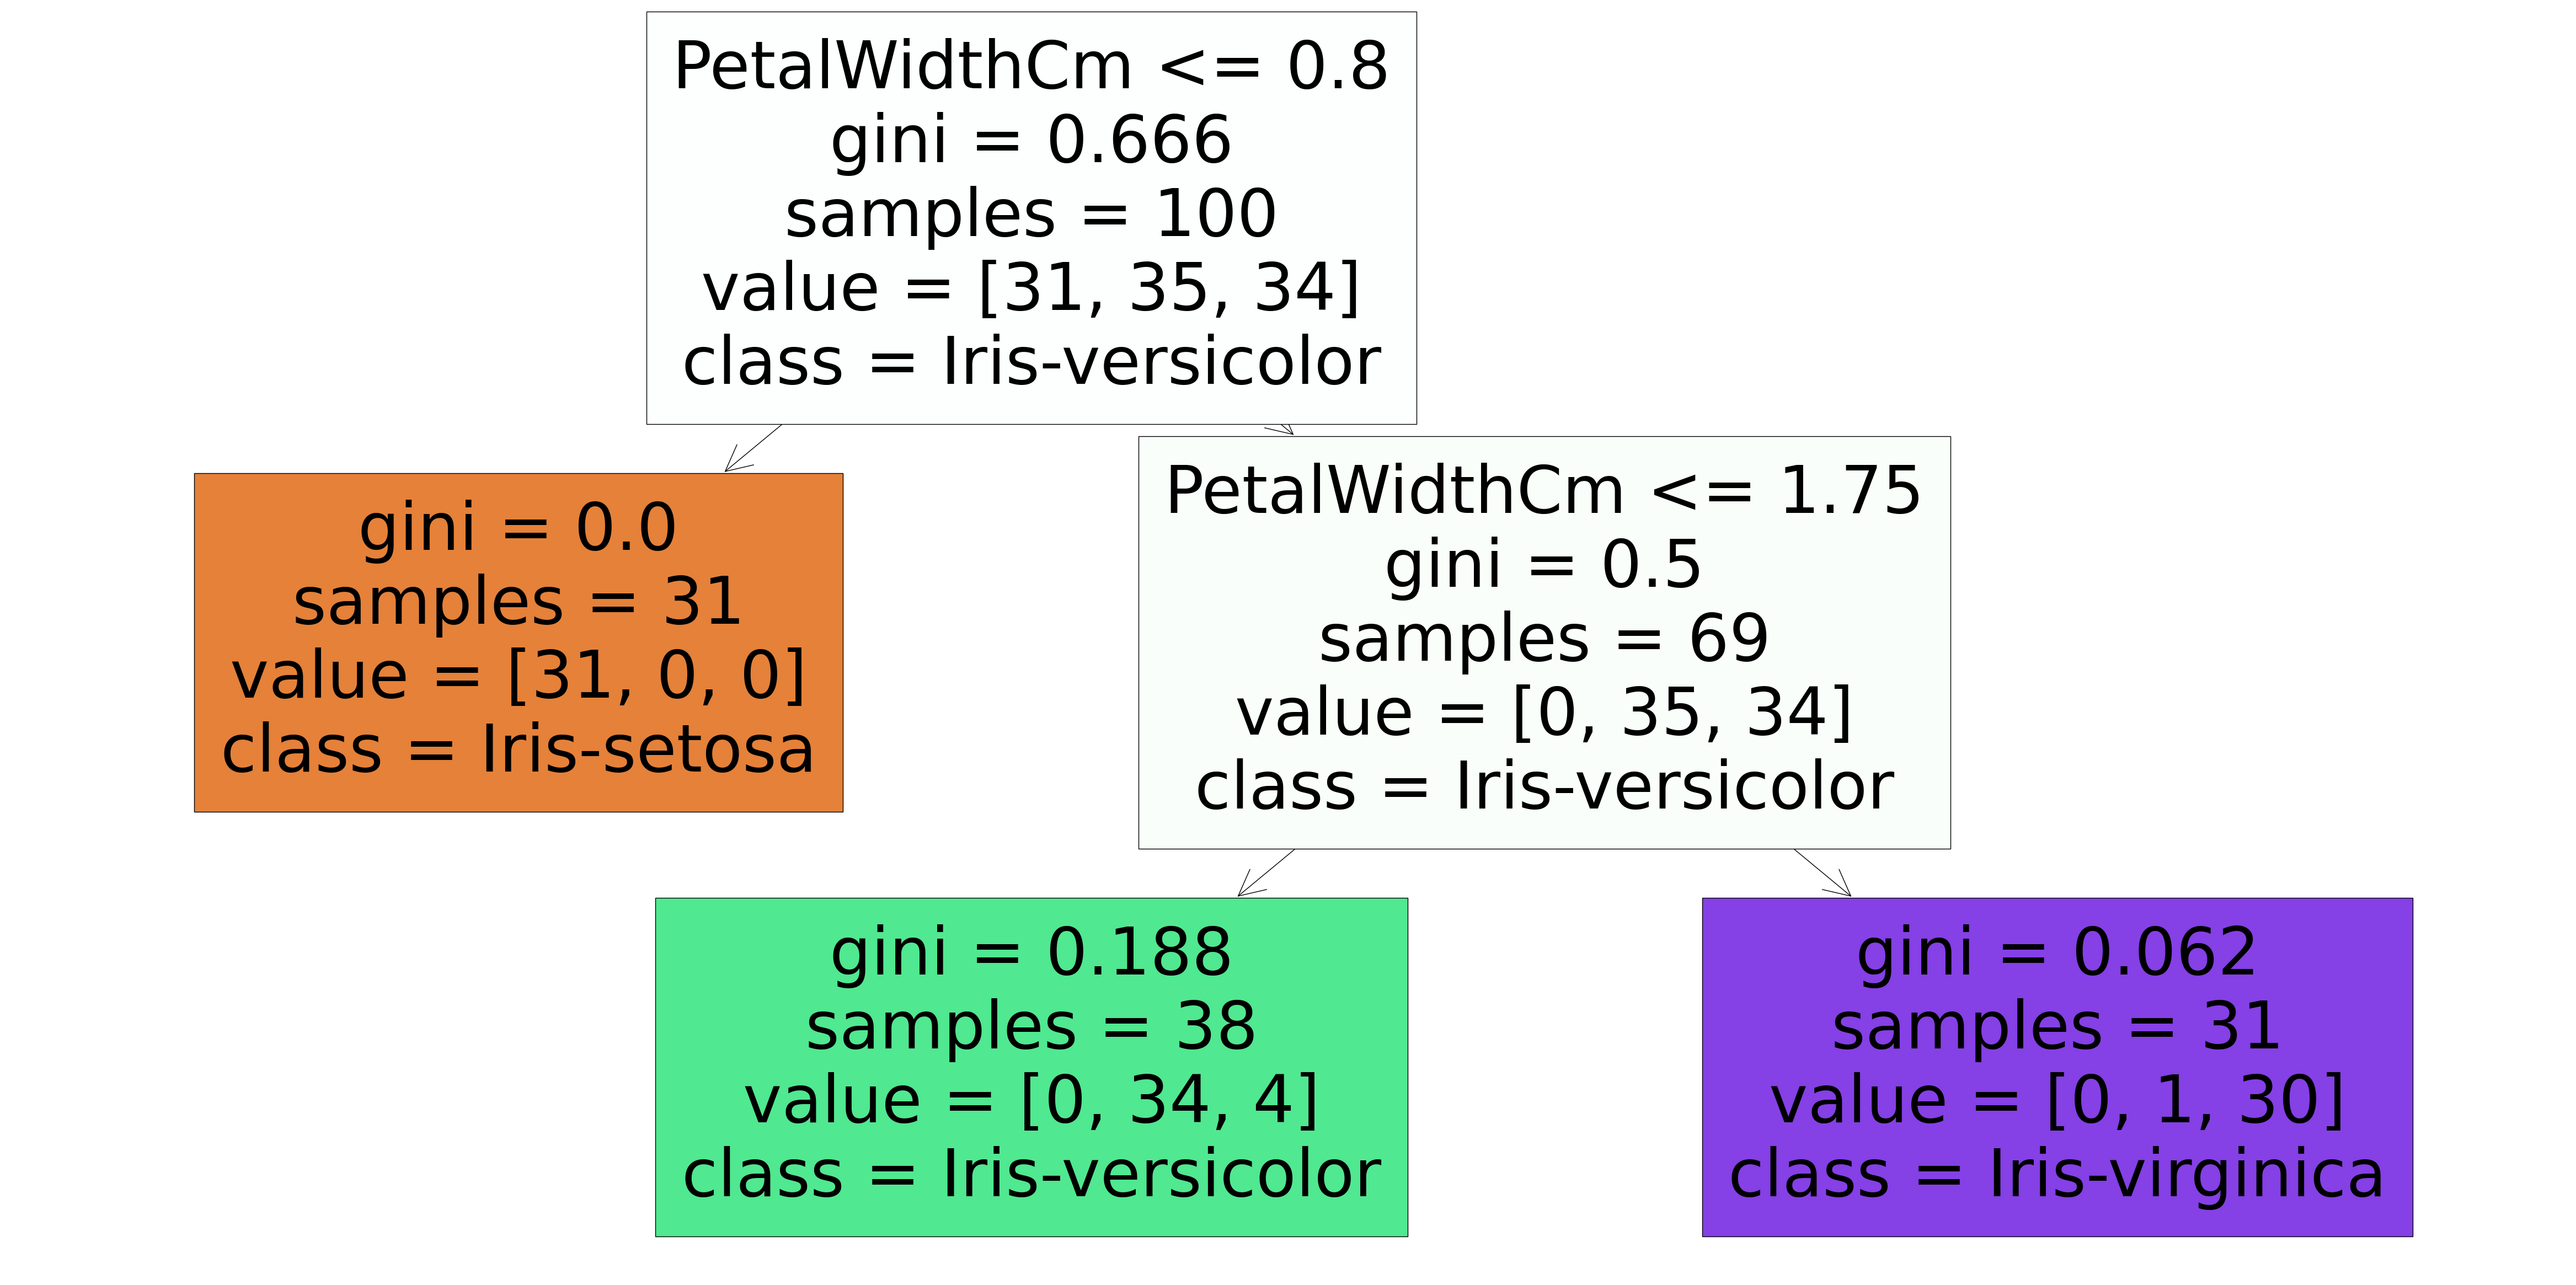

In [20]:
plt.figure(figsize=(60,30))

plot_tree(tree1, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

In [21]:
y_train_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

In [22]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 0.95
Train Confusion Matrix:
[[31  0  0]
 [ 0 34  1]
 [ 0  4 30]]
--------------------------------------------------
Test Performance : 0.98
Test Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Pre Prunning Using Hyper-Parameter Tuning (GridSearchCV)

In [23]:
# Create the parameter grid based on the results of random search 
params = {
    'splitter' : ["best", "random"],
    'max_depth': [*range(1,20)],
    'min_samples_split':[*range(1,20,3)],
    'min_samples_leaf': [*range(1,20,3)],
    'criterion': ["gini", "entropy"],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [26]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 11172 candidates, totalling 44688 fits


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6384 fits failed out of a total of 44688.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6384 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.

Wall time: 1min 20s


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [ nan  nan 0.66 ... 0.49 0.78 0.5 ]
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 7, 10, 13, 16, 19],
                         'min_samples_split': [1, 4, 7, 10, 13, 16, 19],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [27]:
grid_search.cv_results_

{'mean_fit_time': array([0.01171821, 0.0078119 , 0.01171607, ..., 0.00390565, 0.00781047,
        0.        ]),
 'std_fit_time': array([0.00676551, 0.0078119 , 0.00676427, ..., 0.00676479, 0.00781047,
        0.        ]),
 'mean_score_time': array([0., 0., 0., ..., 0., 0., 0.]),
 'std_score_time': array([0., 0., 0., ..., 0., 0., 0.]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 19, 19, 19],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 'log2', 'log2', 'log2'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_sample

In [28]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011718,0.006766,0.000000,0.000000,gini,1,auto,1,1,best,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",NaN,NaN,NaN,NaN,NaN,NaN,11172
1,0.007812,0.007812,0.000000,0.000000,gini,1,auto,1,1,random,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",NaN,NaN,NaN,NaN,NaN,NaN,10038
2,0.011716,0.006764,0.000000,0.000000,gini,1,auto,1,4,best,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.64,0.68,0.68,0.64,0.66,0.020000,7650
3,0.003905,0.006764,0.003905,0.006764,gini,1,auto,1,4,random,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.64,0.56,0.64,0.60,0.61,0.033166,8389
4,0.003906,0.006765,0.003906,0.006765,gini,1,auto,1,7,best,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.64,0.48,0.68,0.64,0.61,0.076811,8389


In [29]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
8259,0.007813,0.007813,0.000000,0.000000,entropy,10,auto,4,19,random,"{'criterion': 'entropy', 'max_depth': 10, 'max...",1.0,0.92,1.00,1.00,0.98,0.034641,1
2259,0.003906,0.006765,0.003905,0.006764,gini,8,log2,1,7,random,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",1.0,0.92,0.96,1.00,0.97,0.033166,2
5005,0.006000,0.003464,0.004757,0.004320,gini,18,auto,1,10,random,"{'criterion': 'gini', 'max_depth': 18, 'max_fe...",1.0,0.92,1.00,0.96,0.97,0.033166,2
9023,0.007810,0.013528,0.000000,0.000000,entropy,12,log2,1,10,random,"{'criterion': 'entropy', 'max_depth': 12, 'max...",1.0,0.92,1.00,0.96,0.97,0.033166,2
11077,0.007812,0.007812,0.003904,0.006762,entropy,19,log2,1,4,random,"{'criterion': 'entropy', 'max_depth': 19, 'max...",1.0,0.92,1.00,0.96,0.97,0.033166,2


In [30]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=4, min_samples_split=19,
                       splitter='random')

In [31]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 19,
 'splitter': 'random'}

In [32]:
grid_search.predict(X_train)

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2], dtype=int64)

In [33]:
tree = DecisionTreeClassifier(criterion='gini',max_depth= 6,max_features='log2',min_samples_leaf=1
                              ,min_samples_split= 4,splitter='random')

In [34]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_split=4,
                       splitter='random')

In [35]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [36]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 0.98
Train Confusion Matrix:
[[31  0  0]
 [ 0 35  0]
 [ 0  2 32]]
--------------------------------------------------
Test Performance : 0.92
Test Confusion Matrix:
[[19  0  0]
 [ 0 14  1]
 [ 0  3 13]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.82      0.93      0.87        15
           2       0.93      0.81      0.87        16

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.91        50
weighted avg       0.92      0.92      0.92        50



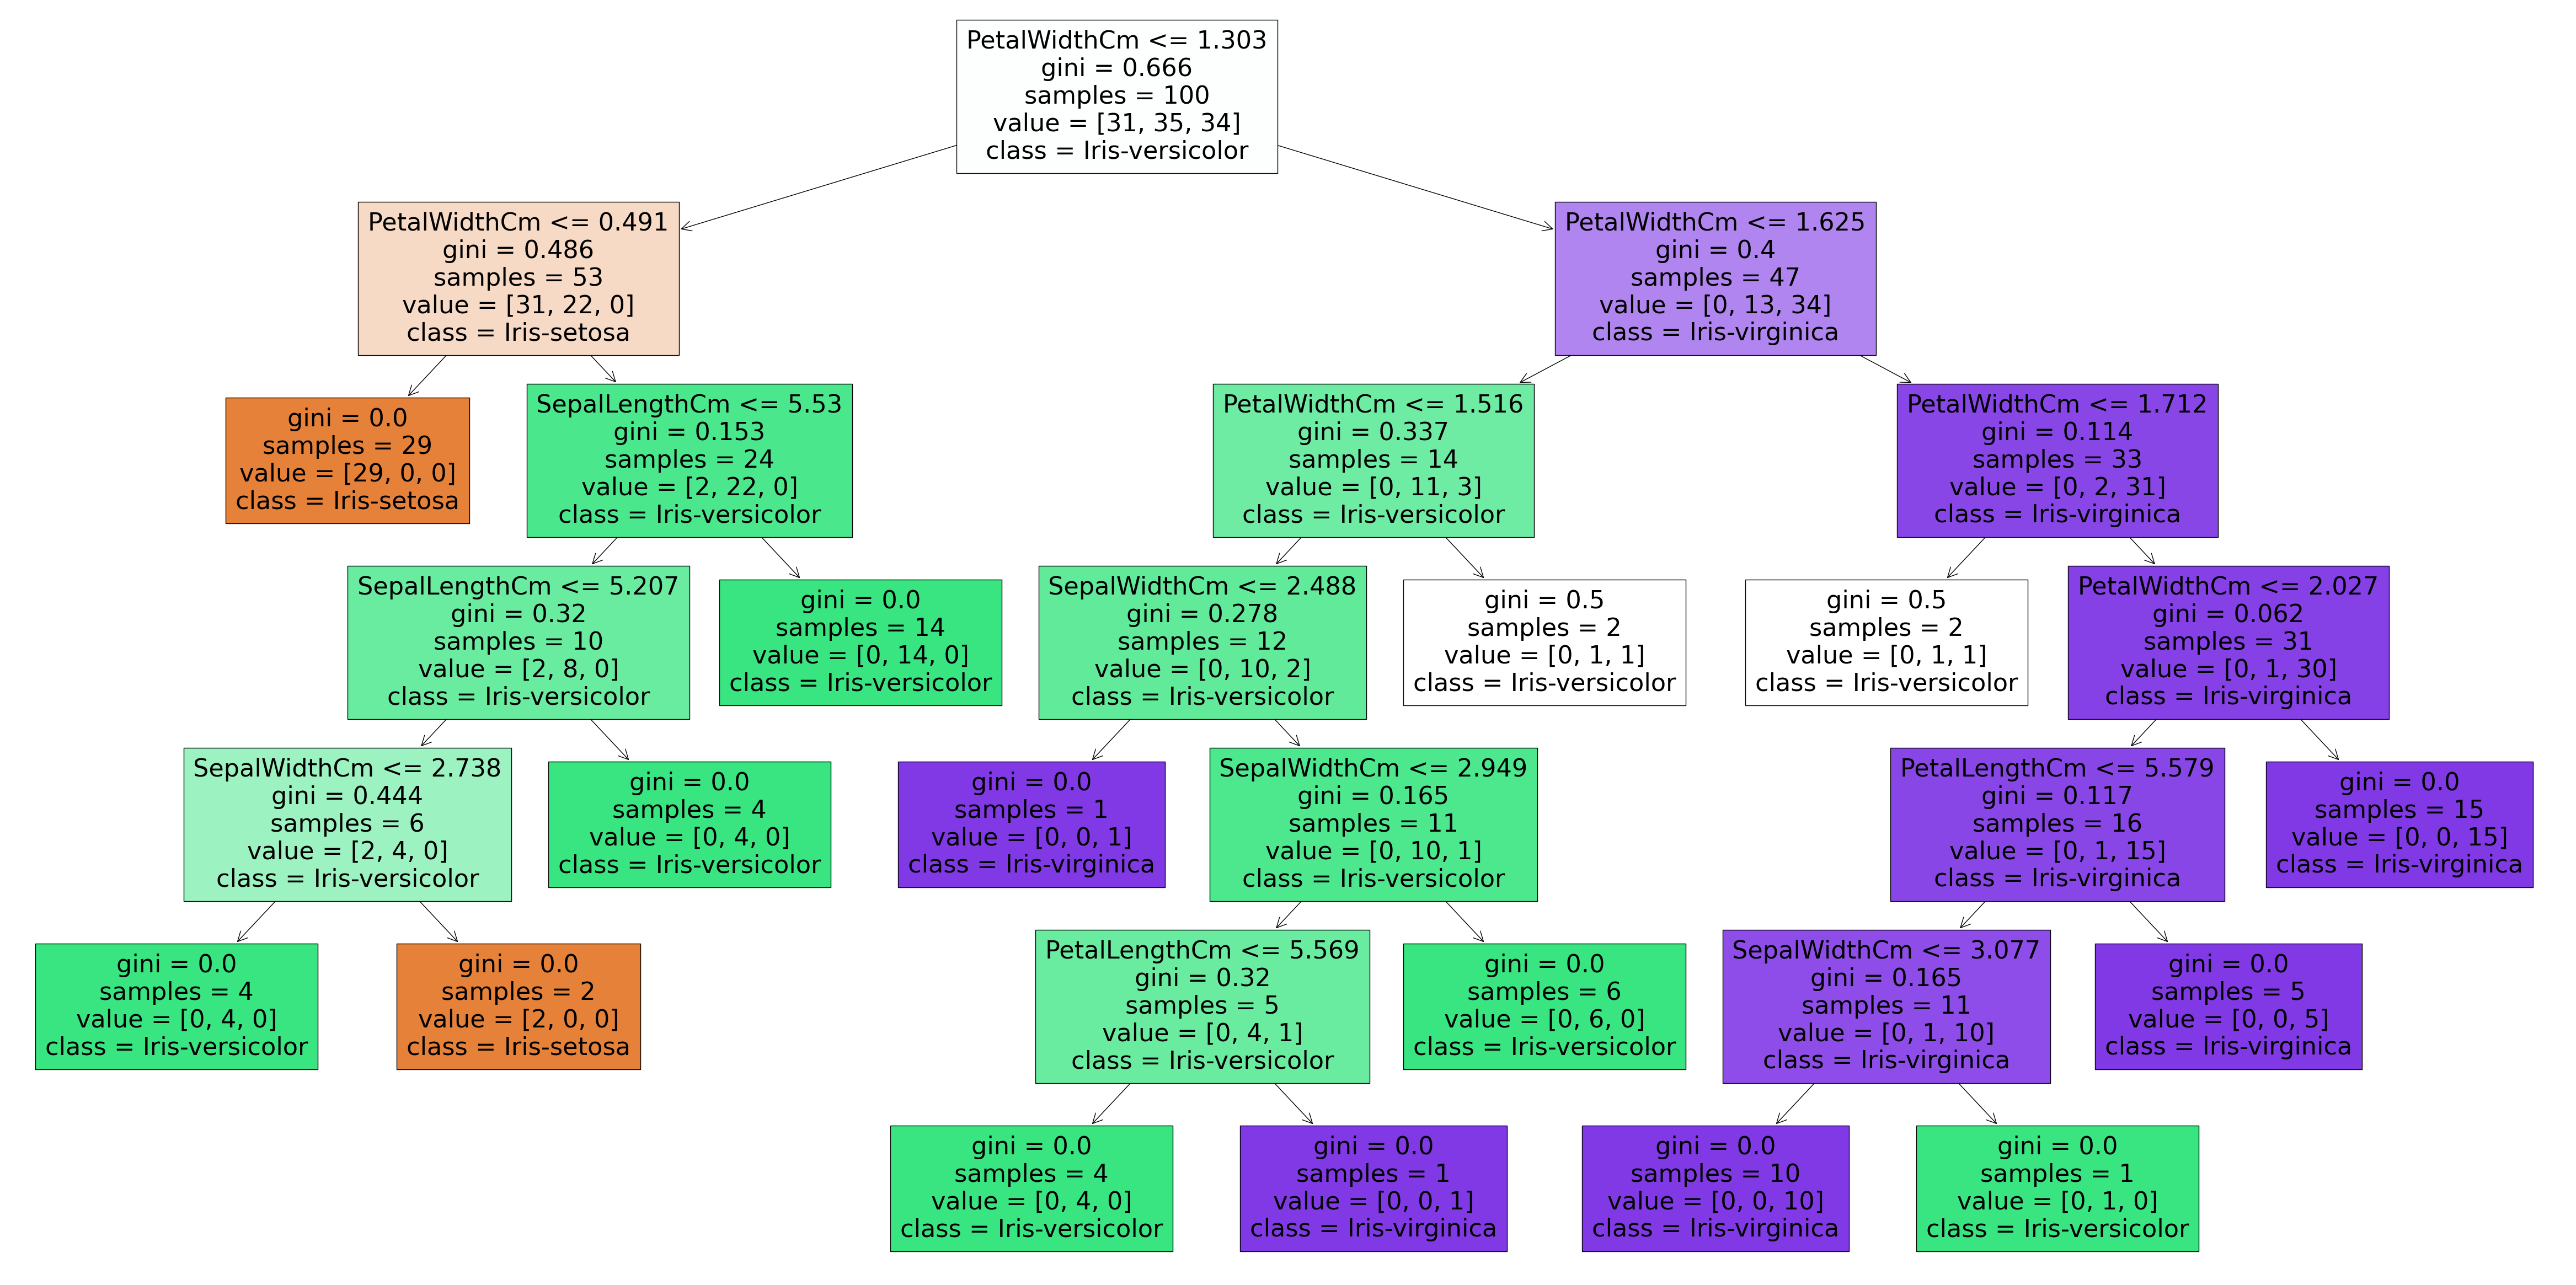

In [39]:
plt.figure(figsize=(60,30))

plot_tree(tree, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

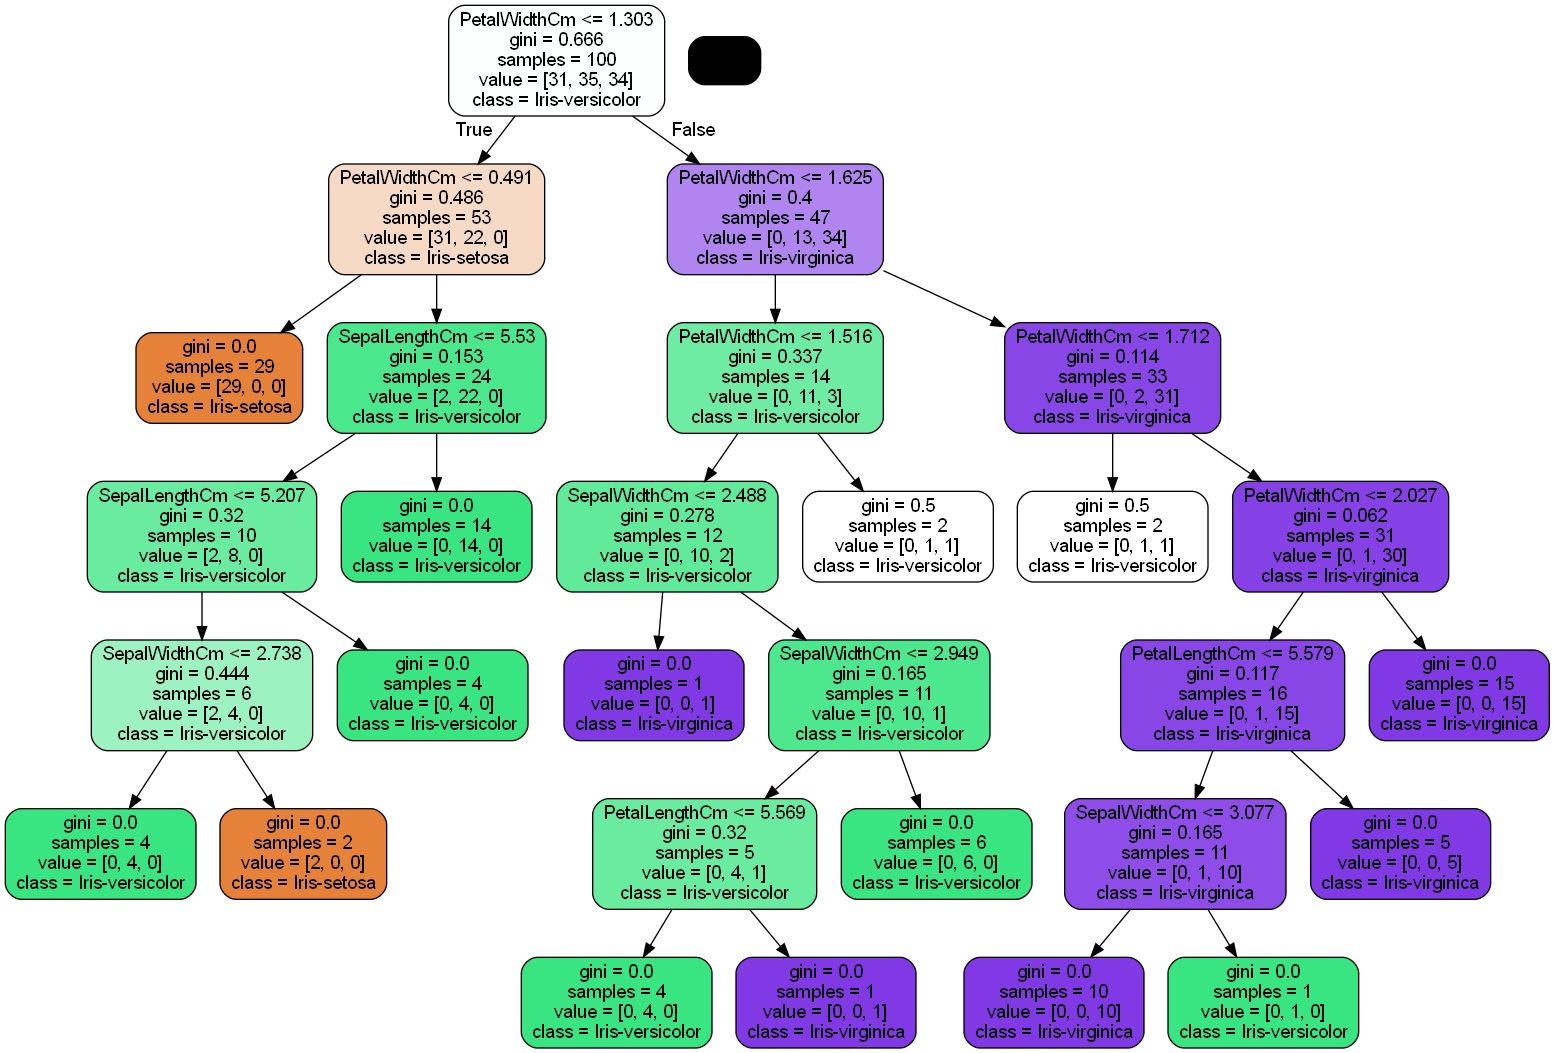

In [38]:
# plotting tree with max_depth=3

dot_data = StringIO()  

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#Image(graph.create_png(),width=800,height=900)